<a href="https://colab.research.google.com/github/FadyYosry77/BreastCancer/blob/main/StochasticProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing libraries**

In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import seaborn as sns
!pip install midiutil
import matplotlib.pyplot as plt
from midiutil.MidiFile import MIDIFile
from IPython.display import Audio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-py3-none-any.whl size=54569 sha256=f22b3a2cea255913354fff65ef9e34af9d40d5dff9786fca899150711c7d7e5d
  Stored in directory: /root/.cache/pip/wheels/88/7f/1a/19f62946c3c836b60cf789576f327f73ad8778a7e954e998c3
Successfully built midiutil


# **Gathering sample data**

In [ ]:
# 100 notes from Beethoven's "Moonlight Sonata" (1st movement) - simplified
training_data = [
    'C5', 'E5', 'G5', 'C6', 'E6', 'G5', 'E5', 'C5', 'D5', 'F5', 'A5', 'D6', 'F6', 'A5', 'F5', 'D5',
    'E5', 'G5', 'B5', 'E6', 'G6', 'B5', 'G5', 'E5', 'F5', 'A5', 'C6', 'F6', 'A6', 'F6', 'C6', 'A5',
    'G5', 'C6', 'E6', 'G6', 'C7', 'G6', 'E6', 'C6', 'G5', 'B5', 'D6', 'F6', 'B6', 'F6', 'D6', 'B5',
    'C5', 'E5', 'G5', 'C6', 'E6', 'G5', 'E5', 'C5', 'A4', 'C5', 'E5', 'A5', 'E5', 'C5', 'A4', 'C5',
    'D5', 'F5', 'A5', 'D6', 'F6', 'A5', 'F5', 'D5', 'B4', 'D5', 'F5', 'B5', 'F5', 'D5', 'B4', 'D5',
    'E5', 'G5', 'B5', 'E6', 'G6', 'B5', 'G5', 'E5', 'C5', 'E5', 'G5', 'C6', 'G5', 'E5', 'C5'
]
print("Training data: ",training_data)

Training data:  ['C5', 'E5', 'G5', 'C6', 'E6', 'G5', 'E5', 'C5', 'D5', 'F5', 'A5', 'D6', 'F6', 'A5', 'F5', 'D5', 'E5', 'G5', 'B5', 'E6', 'G6', 'B5', 'G5', 'E5', 'F5', 'A5', 'C6', 'F6', 'A6', 'F6', 'C6', 'A5', 'G5', 'C6', 'E6', 'G6', 'C7', 'G6', 'E6', 'C6', 'G5', 'B5', 'D6', 'F6', 'B6', 'F6', 'D6', 'B5', 'C5', 'E5', 'G5', 'C6', 'E6', 'G5', 'E5', 'C5', 'A4', 'C5', 'E5', 'A5', 'E5', 'C5', 'A4', 'C5', 'D5', 'F5', 'A5', 'D6', 'F6', 'A5', 'F5', 'D5', 'B4', 'D5', 'F5', 'B5', 'F5', 'D5', 'B4', 'D5', 'E5', 'G5', 'B5', 'E6', 'G6', 'B5', 'G5', 'E5', 'C5', 'E5', 'G5', 'C6', 'G5', 'E5', 'C5']


# **Defining functions for training and generating**

## **Markov chain for one state constructing function**

In [ ]:
def construct_markov_chain(state,data):
  markov_chain = {}
  cnt=0
  for i in range(1,len(data)):
    if(data[i-1]==state):
      markov_chain[data[i]] = markov_chain.get(data[i],0)+1
      cnt+=1

  for key in markov_chain:
    #print(f"From state {state} To state {key} : {markov_chain[key]/cnt}")
    markov_chain[key] = markov_chain[key]/cnt
  return markov_chain

## **Full Markov chain constructing function for plots**

In [ ]:
def build_full_markov_chain(data):
    states = set(data)
    full_chain = {}
    for state in states:
        full_chain[state] = construct_markov_chain(state, data)
    return full_chain

full_chain = build_full_markov_chain(training_data)

## **Predicting next note function**

In [ ]:
def predict_next_note(current_state, markov_chain:dict):
  states = list(markov_chain.keys())
  probabilities = list(markov_chain.values())
  return str(np.random.choice(states, p=probabilities))

## **Generating a fixed-size sequence**

In [ ]:
def generate_sequence(init_state,sequence_length):
  sequence = [init_state]
  current_state = init_state
  while(len(sequence) < sequence_length):
    markov_chain = construct_markov_chain(current_state, training_data)
    next_state = predict_next_note(current_state, markov_chain)
    sequence.append(next_state)
    current_state = sequence[-1]
  return sequence

# **transition matrix**

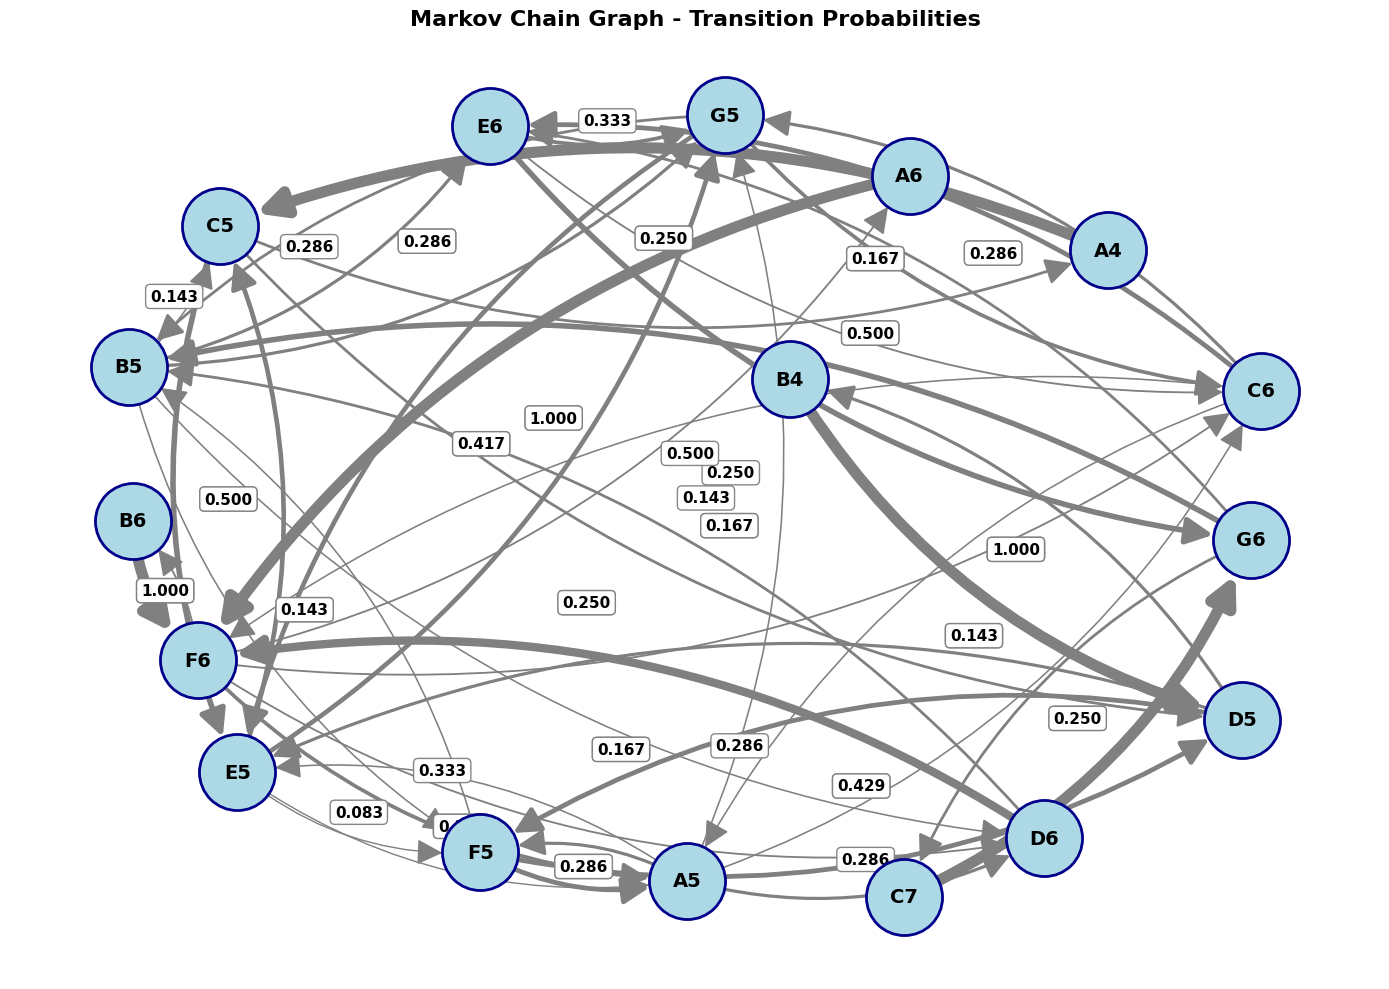

In [ ]:
# Create a FRESH graph
G = nx.DiGraph()

# Add edges from the Markov chain
for from_state, transitions in full_chain.items():
    for to_state, prob in transitions.items():
        G.add_edge(from_state, to_state, weight=prob)

# Calculate layout
pos = nx.spring_layout(G, seed=42, k=2, iterations=50)

# Create NEW figure
plt.figure(figsize=(14, 10))

# Draw nodes
nx.draw_networkx_nodes(
    G, pos,
    node_size=3000,
    node_color="lightblue",
    edgecolors='darkblue',
    linewidths=2
)

# Draw edges
edges = list(G.edges())
weights = [G[u][v]['weight'] for u, v in edges]

nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[max(w*8, 1) for w in weights],
    arrowstyle='-|>',
    arrowsize=40,
    edge_color='gray',
    connectionstyle='arc3,rad=0.2',
    min_source_margin=25,
    min_target_margin=25,
    node_size=3000
)

# Draw node labels
nx.draw_networkx_labels(
    G, pos,
    font_size=14,
    font_weight='bold',
    font_color='black'
)

# Draw edge labels
edge_labels = {(u, v): f"{G[u][v]['weight']:.3f}" for u, v in edges}
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_size=11,
    font_weight='bold',
    label_pos=0.5,
    rotate=False,
    bbox=dict(
        boxstyle="round,pad=0.3",
        facecolor="white",
        edgecolor="gray",
        alpha=0.95
    )
)

plt.title("Markov Chain Graph - Transition Probabilities", fontsize=16, fontweight='bold')
plt.axis("off")
plt.tight_layout()
plt.show()

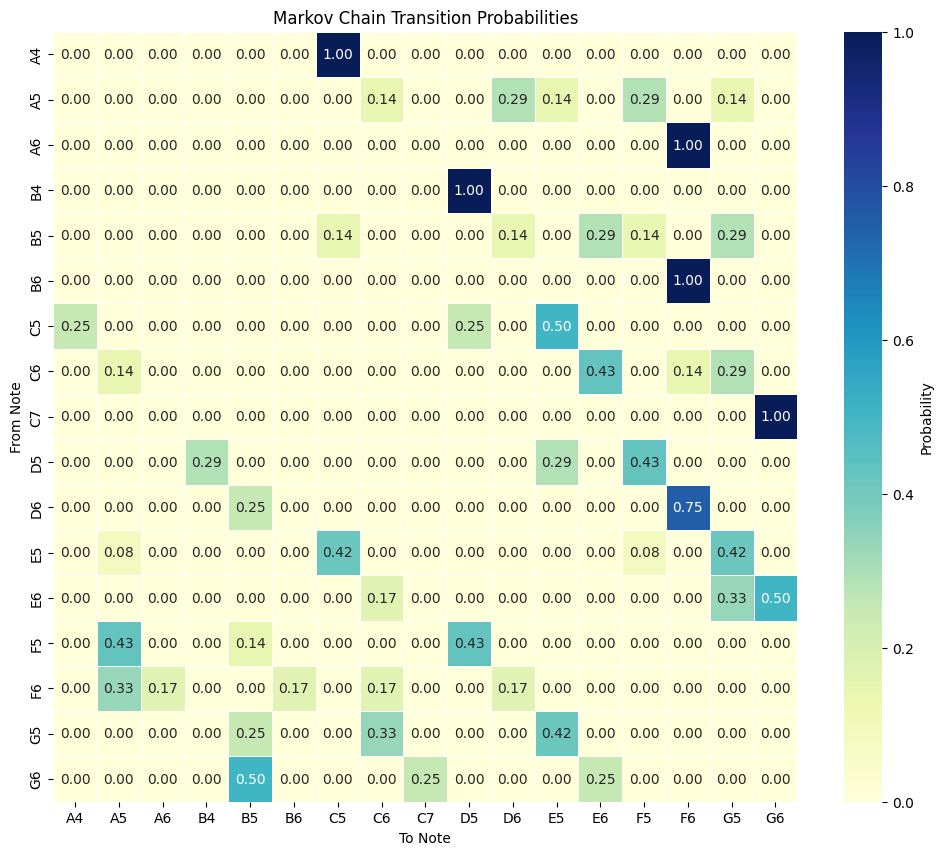

In [ ]:
# 2. Get all unique notes from the training_data (already sorted)
all_unique_notes = sorted(list(set(training_data)))

# 3. Initialize a transition matrix with zeros
transition_probabilities = pd.DataFrame(0.0, index=all_unique_notes, columns=all_unique_notes)

# 4. Populate the transition_probabilities DataFrame from the full_chain
for from_state, transitions in full_chain.items():
    for to_state, prob in transitions.items():
        if from_state in all_unique_notes and to_state in all_unique_notes:
            transition_probabilities.loc[from_state, to_state] = prob

# 5. Create a heatmap using sns.heatmap()
plt.figure(figsize=(12, 10)) # Adjust figure size for better readability
sns.heatmap(
    transition_probabilities,
    annot=True,
    cmap='YlGnBu',
    fmt='.2f',
    linewidths=.5,
    cbar_kws={'label': 'Probability'}
)

# Add title and labels
plt.title('Markov Chain Transition Probabilities')
plt.xlabel('To Note')
plt.ylabel('From Note')

# 6. Display the plot
plt.show()

## **Generating Music file**

In [ ]:
def generate_and_play_music(note_sequence, tempo=120, default_duration=1, output_filename='generated_music.mid'):
    midi_file = MIDIFile(1)

    track = 0
    time = 0 # Start time
    midi_file.addTrackName(track, time, "Generated Melody")
    midi_file.addTempo(track, time, tempo)

    channel = 0
    volume = 100 # Max volume

    # Simplified note to semitone mapping (only natural notes)
    note_map = {'C': 0, 'D': 2, 'E': 4, 'F': 5, 'G': 7, 'A': 9, 'B': 11}

    # Add notes to the MIDI file
    for note_str in note_sequence:
        try:
            # Inlined and simplified note_to_midi logic
            note_name = note_str[0]
            octave = int(note_str[1:])
            semitone = note_map[note_name]

            # MIDI note number = (octave + 1) * 12 + semitone
            midi_note_number = (octave + 1) * 12 + semitone

            midi_file.addNote(track, channel, midi_note_number, time, default_duration, volume)
            time += default_duration # Advance time for the next note
        except (ValueError, KeyError) as e:
            print(f"Skipping invalid note: {note_str} - {e}. This simple version only supports natural notes (A-G) and octaves (e.g., 'C4').")

    # Write the MIDI file to disk
    with open(output_filename, "wb") as output_file:
        midi_file.writeFile(output_file)

    print(f"Music saved as {output_filename}")

    # Play the MIDI file in the notebook
    return Audio(output_filename)

## **Example Usage**

In [ ]:
cnt=0

In [ ]:
generated_sequence = generate_sequence('C5', 30)
print(generated_sequence)
# Generate and play the music
cnt+=1
generate_and_play_music(generated_sequence, tempo=150, default_duration=0.8,output_filename=f"Test{cnt}.mid")

['C5', 'D5', 'B4', 'D5', 'E5', 'C5', 'D5', 'F5', 'A5', 'D6', 'F6', 'A5', 'F5', 'A5', 'F5', 'D5', 'B4', 'D5', 'E5', 'G5', 'B5', 'E6', 'G5', 'B5', 'E6', 'G5', 'B5', 'E6', 'G6', 'B5']
Music saved as Test1.mid


# **Training Vs Generated notes**

In [ ]:
def note_to_midi(note_str):
    # Simplified note to semitone mapping (only natural notes)
    note_map = {'C': 0, 'D': 2, 'E': 4, 'F': 5, 'G': 7, 'A': 9, 'B': 11}

    note_name = note_str[0]
    octave = int(note_str[1:])
    semitone = note_map[note_name]

    # MIDI note number = (octave + 1) * 12 + semitone
    midi_note_number = (octave + 1) * 12 + semitone
    return midi_note_number

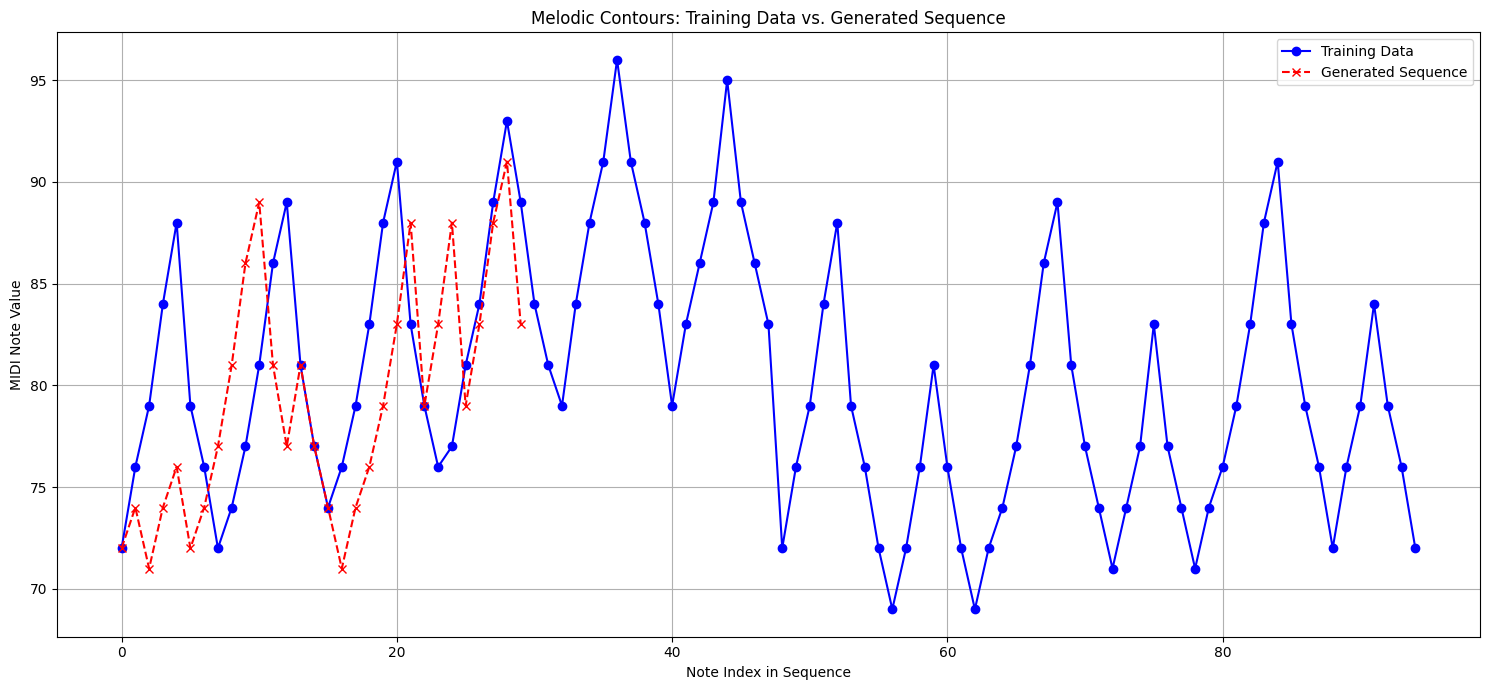

Melodic contours of training and generated sequences displayed.


In [ ]:
training_midi_values = [note_to_midi(note) for note in training_data]
generated_midi_values = [note_to_midi(note) for note in generated_sequence]

# 3. Plot both numerical sequences on the same line graph
plt.figure(figsize=(15, 7))
plt.plot(training_midi_values, label='Training Data', color='blue', marker='o', linestyle='-')
plt.plot(generated_midi_values, label='Generated Sequence', color='red', marker='x', linestyle='--')

# 4. Add a legend to distinguish between the training data and generated sequence.
plt.legend()

# 5. Include appropriate titles and labels for clarity.
plt.title('Melodic Contours: Training Data vs. Generated Sequence')
plt.xlabel('Note Index in Sequence')
plt.ylabel('MIDI Note Value')



# 6. Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
print("Melodic contours of training and generated sequences displayed.")